# Imports

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from zipfile import ZipFile
%matplotlib inline

# ETL - Extract, Transform, and Load

## Extract

In [130]:
RELATIVE_PATH = os.path.join(os.getcwd(), 'input')

FILE = 'microdados_enade_2019_engenharias_UFPA.csv'

ABSOLUTE_PATH = os.path.join(RELATIVE_PATH, FILE)

df = pd.read_csv(ABSOLUTE_PATH, delimiter=";")

df.head()

,INDEX,ANO EXAME,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,IDADE_CURSO,CO_CURSO,CO_MODALIDADE,MUNICIPIO CURSO,...,A instituição dispôs de quantidade suficiente de funcionários para o apoio administrativo e acadêmico.,O curso disponibilizou monitores ou tutores para auxiliar os estudantes.,As condições de infraestrutura das salas de aula foram adequadas.,Os equipamentos e materiais disponíveis para as aulas práticas foram adequados para a quantidade de estudantes.,Os ambientes e equipamentos destinados às aulas práticas foram adequados ao curso.,A biblioteca dispôs das referências bibliográficas que os estudantes necessitaram.,A instituição contou com biblioteca virtual ou conferiu acesso a obras disponíveis em acervos virtuais.,"As atividades acadêmicas desenvolvidas dentro e fora da sala de aula possibilitaram reflexão, convivência e respeito à diversidade.","A instituição promoveu atividades de cultura, de lazer e interação social.","A instituição dispôs de refeitório, cantina e banheiros em condições adequadas que atenderam as necessidades dos seus usuários."
0,1,2019,569,10002,10028,ENGENHARIA CIVIL,90.0,12001,1,BELEM,...,Concordo,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
1,2,2019,569,10002,10028,ENGENHARIA CIVIL,90.0,12001,1,BELEM,...,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente,Concordo totalmente
2,3,2019,569,10002,10028,ENGENHARIA CIVIL,90.0,12001,1,BELEM,...,Concordo parcialmente,Discordo parcialmente,Concordo,Concordo parcialmente,Concordo parcialmente,Concordo parcialmente,Concordo parcialmente,Concordo parcialmente,Discordo parcialmente,Concordo parcialmente
3,4,2019,569,10002,10028,ENGENHARIA CIVIL,90.0,12001,1,BELEM,...,Concordo parcialmente,Concordo parcialmente,Concordo,Concordo parcialmente,Concordo,Concordo totalmente,Discordo parcialmente,Concordo,Concordo totalmente,Concordo
4,5,2019,569,10002,10028,ENGENHARIA CIVIL,90.0,12001,1,BELEM,...,Discordo parcialmente,Concordo parcialmente,Concordo,Discordo parcialmente,Discordo parcialmente,Discordo parcialmente,Não se aplica,Concordo parcialmente,Concordo parcialmente,Concordo parcialmente


# Data Analysis

## Filters

In [144]:
bol_TP_PR_GER = df['TP_PR_GER'] == 555

## 01 - Grade per course

In [175]:
columns = [
    'CO_GRUPO',    
    'NOTA PROVA'
]

df_temp = df[bol_TP_PR_GER][columns]

df_temp.groupby('CO_GRUPO').agg({'NOTA PROVA': ['mean', 'std']})

NOTA PROVA           
                               mean        std
CO_GRUPO                                      
ENGENHARIA AMBIENTAL      49.650962  10.813736
ENGENHARIA CIVIL          49.805000  12.144175
ENGENHARIA DA COMPUTAÇÃO  33.796850  11.334502
ENGENHARIA DE ALIMENTOS   53.603571   6.966985
ENGENHARIA DE PRODUÇÃO    38.548387   9.915136
ENGENHARIA ELÉTRICA       35.571809  12.635774
ENGENHARIA FLORESTAL      36.739130  11.136987
ENGENHARIA MECÂNICA       39.559341  11.835840
ENGENHARIA QUÍMICA        37.925714  11.333594

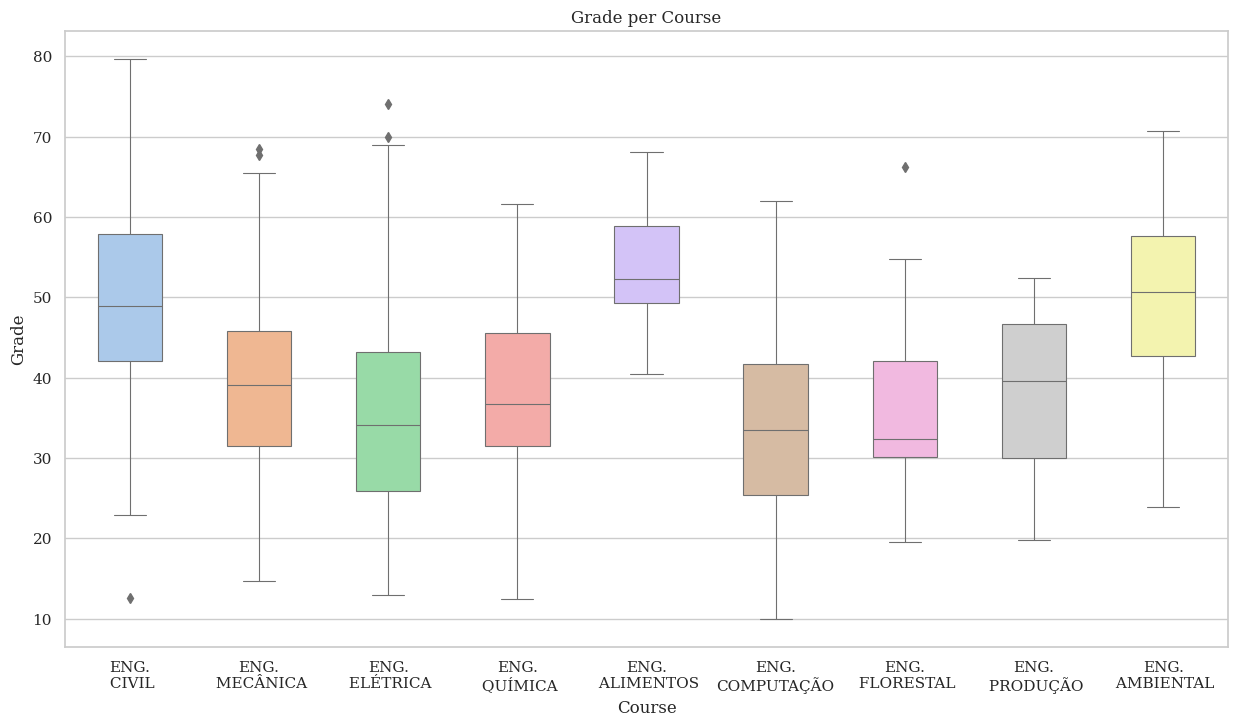

In [224]:
df_temp['CO_GRUPO'] = df['CO_GRUPO'].apply(lambda x: x.replace('ENGENHARIA', 'ENG.\n').replace(' DA ', '').replace(' DE', ''))

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 0.8})

sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

fig_dims = (15, 8)

fig, ax = plt.subplots(figsize=fig_dims)

palette = 'pastel'

sns.boxplot(df_temp,
            x='CO_GRUPO',
            y='NOTA PROVA',
            palette=palette,
            width=0.5)

plt.xlabel('Course')
plt.ylabel('Grade')
plt.title('Grade per Course')

prefix = '01_grade_per_course'

png_name = f"{prefix}.png"
zip_name = f"{prefix}.zip"

path_output = os.path.join(os.getcwd(), 'output')
plt.savefig(os.path.join(path_output, png_name), dpi=300)

with ZipFile(os.path.join(path_output, zip_name), 'w') as f:            
    f.write(os.path.join(path_output, png_name))